### imports

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

In [55]:
# check PyTorch version and CUDA availability
print(torch.__version__)
print(torch.cuda.is_available())

2.7.0+cpu
False


In [56]:
# Load the dataset
df = pd.read_csv('datasets\Breastcancer.csv')

In [57]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [59]:
df.shape

(569, 33)

In [60]:
# drop unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [61]:
df.shape

(569, 31)

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [63]:
# CHECK: if there are any missing values
print(df.isnull().sum().sum())
# CHECK: if there are any duplicate rows
print(df.duplicated().sum())

0
0


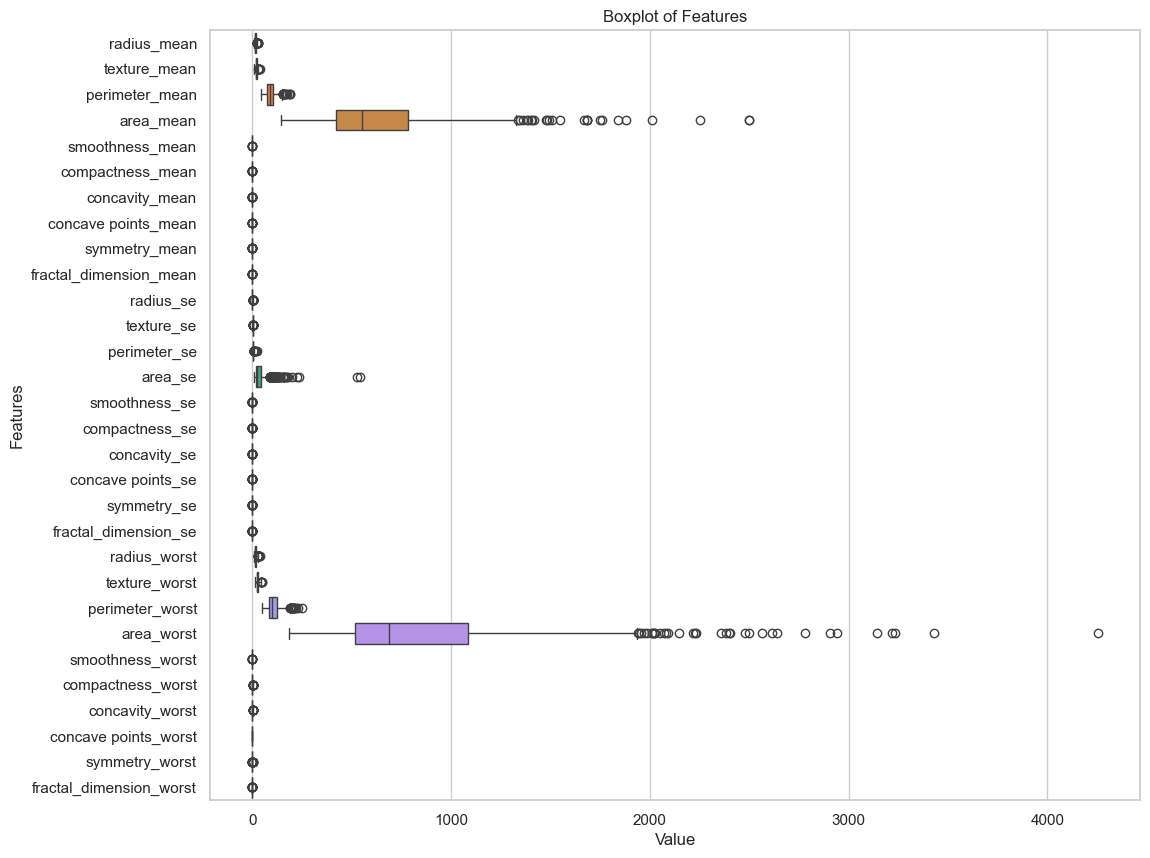

In [64]:
# check for outliers in the dataset
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, orient='h')
sns.set(style="whitegrid")
plt.title('Boxplot of Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

In [65]:
# drop outliers using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
# shape before dropping outliers
print("Shape before dropping outliers:", df.shape)
df = df[(z_scores < 3).all(axis=1)]
# shape after dropping outliers
print("Shape after dropping outliers:", df.shape)

Shape before dropping outliers: (569, 31)
Shape after dropping outliers: (495, 31)


- NN isnt sensitive to scaling,and outliers but it's a good practice

In [66]:
# categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['diagnosis']

In [67]:
# only target column is categorical
# convert categorical column to numerical
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})    # can use LabelEncoder as well

In [68]:
# save mapping for future use
mapping = {'M': 1, 'B': 0}

In [69]:
# prepare data for training
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [70]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)  # Stratify maintains class proportions

In [71]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Returns numpy array

In [72]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

In [ ]:
# Define Multilayer Perceptron (MLP) Model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)  # Binary output

        # Xavier Initialization
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        nn.init.xavier_normal_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))    # sigmoid for binary clf
        return x

In [74]:
# Initialize model, loss function, and optimizer
model = MLP(input_dim=X_train.shape[1])
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [75]:
# Training loop
num_epochs = 100
losses = []  # To store loss values for plotting

for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())  # Save loss

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.3102
Epoch [20/100], Loss: 0.1361
Epoch [30/100], Loss: 0.0818
Epoch [40/100], Loss: 0.0603
Epoch [50/100], Loss: 0.0470
Epoch [60/100], Loss: 0.0372
Epoch [70/100], Loss: 0.0293
Epoch [80/100], Loss: 0.0224
Epoch [90/100], Loss: 0.0168
Epoch [100/100], Loss: 0.0123


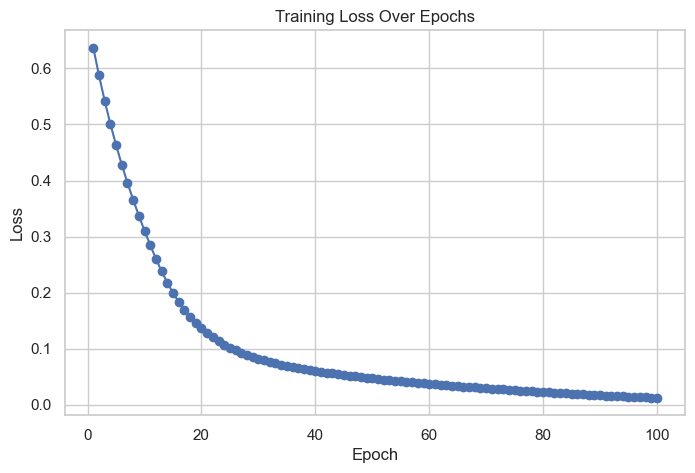

In [76]:
# visualize loss over epochs

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [77]:
# Inference (Test)
with torch.no_grad():
    X_test_scaled = scaler.transform(X_test)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

    y_pred = model(X_test_tensor)
    y_pred_label = (y_pred >= 0.5).float()

    acc = (y_pred_label.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]
    print(f"Test Accuracy: {acc:.4f}")
    

Test Accuracy: 0.9899


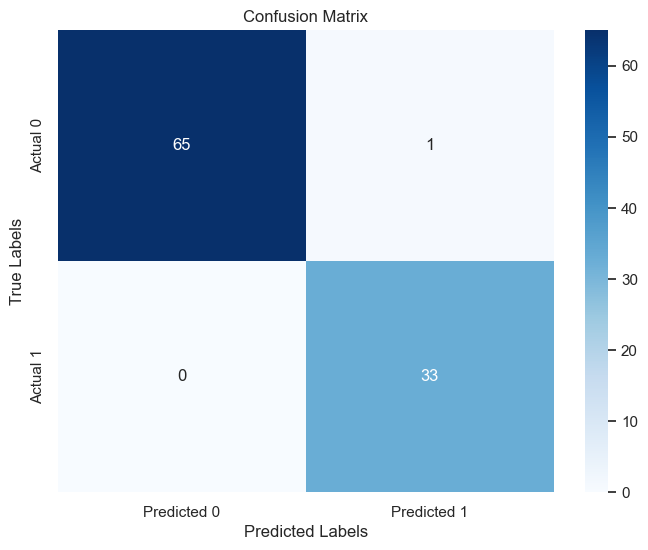

In [78]:
from sklearn.metrics import confusion_matrix

# Convert tensors to numpy arrays
y_true = y_test_tensor.numpy()
y_pred_np = y_pred_label.numpy()

cm = confusion_matrix(y_true, y_pred_np)

# vizualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()